<a href="https://colab.research.google.com/github/Yamm23/Learning-Macine-Learning/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary modules and datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
train_df = pd.read_csv('/content/drive/MyDrive/LearningAI_CSV/Titanic Dataset/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/LearningAI_CSV/Titanic Dataset/test.csv')

In [ ]:
#Inspect Training Data
print("Training Data Head:")
print(train_df.head())
print("\nTraining Data Info:")
print(train_df.info())
print("\nTraining Data Description:")
print(train_df.describe())
print("\nMissing Values")
print(train_df.isnull().sum())

Training Data Head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500

In [ ]:
#Inspect Test Data
print("Test Data Head:")
print(test_df.head())
print("\nTest Data Info:")
print(test_df.info())
print("\nTest Data Description:")
print(test_df.describe())
print("\nMissing Values")
print(test_df.isnull().sum())

Test Data Head:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype

**Data Preprocessing**

In [ ]:
#Before encoding, checking the unique elements of the object type columns
print(train_df['Sex'].unique())
print(train_df['Embarked'].unique())
print(test_df['Sex'].unique())
print(test_df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q' nan]
['male' 'female']
['Q' 'S' 'C']


In [ ]:
train_df[(train_df['Pclass'] == 1)&(train_df['Cabin'].notnull())][['Ticket', 'Cabin']]

,Ticket,Cabin
1,PC 17599,C85
3,113803,C123
6,17463,E46
11,113783,C103
23,113788,A6
...,...,...
871,11751,D35
872,695,B51 B53 B55
879,11767,C50
887,112053,B42


In [ ]:
train_df[(train_df['Pclass'] == 2)&(train_df['Cabin'].notnull())][['Ticket', 'Cabin']]

,Ticket,Cabin
21,248698,D56
66,C.A. 29395,F33
123,27267,E101
148,230080,F2
183,230136,F4
193,230080,F2
292,SC/Paris 2163,D
303,226593,E101
327,28551,D
340,230080,F2


In [ ]:
train_df[(train_df['Pclass']==3) & (train_df['Cabin'].notnull())][['Ticket','Cabin']]

,Ticket,Cabin
10,PP 9549,G6
75,348123,F G73
128,2668,F E69
205,347054,G6
251,347054,G6
394,PP 9549,G6
429,SOTON/O.Q. 392078,E10
699,348121,F G63
715,348124,F G73
751,392096,E121


In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# for embarkation in (train_df['Embarked'].unique()):
#   plt.figure()
#   train_df[train_df['Embarked']==embarkation]['Pclass'].hist(bins=20,alpha=0.5)
#   plt.title(f"Passenger class distribution of {embarkation} location")
#   plt.xlabel('Pclass')
#   plt.ylabel('Number of Passenger')
#   plt.show()

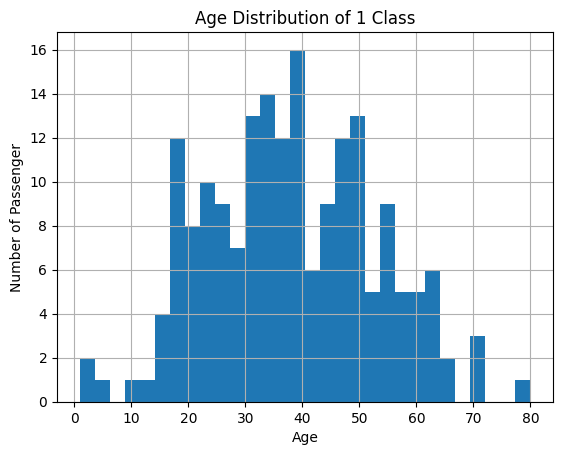

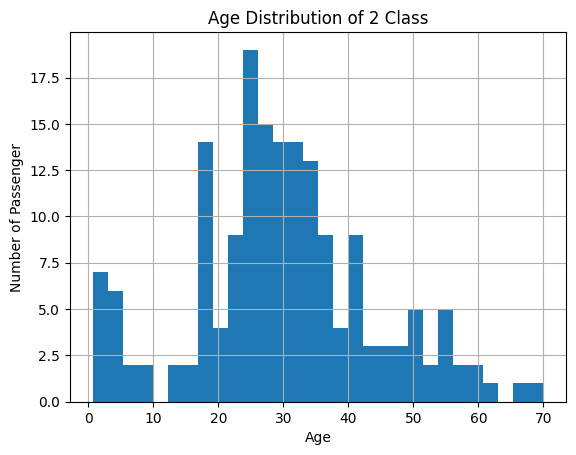

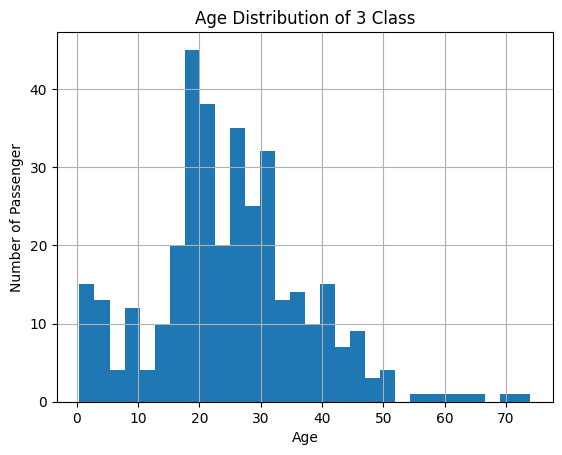

In [ ]:
#Checking the age group for various passenger class.
for classes in sorted(train_df['Pclass'].unique()):
  plt.figure()
  train_df[train_df['Pclass']==classes]['Age'].hist(bins=30,alpha=1,)
  plt.title(f'Age Distribution of {classes} Class')
  plt.xlabel('Age')
  plt.ylabel('Number of Passenger')
  plt.show()

In [ ]:
# Fill missing Age values with the median age of each Pclass
train_df['Age'] = train_df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
test_df['Age'] = train_df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

In [ ]:
#Removing any unecessary columns
train_data = train_df.drop(['Name','Ticket','Cabin'],axis = 1)
test_data = test_df.drop(['Name','Ticket','Cabin'],axis = 1)

In [ ]:
# Replace the null values
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])
# Encode categorical data
train_data['Sex']=train_data['Sex'].str.strip().str.lower().map({'male':0,'female':1})
test_data['Sex']=test_data['Sex'].str.strip().str.lower().map({'male':0,'female':1})
train_data['Embarked']=train_data['Embarked'].map({'C':0,'S':1,'Q':2})
test_data['Embarked']=test_data['Embarked'].map({'C':0,'S':1,'Q':2})

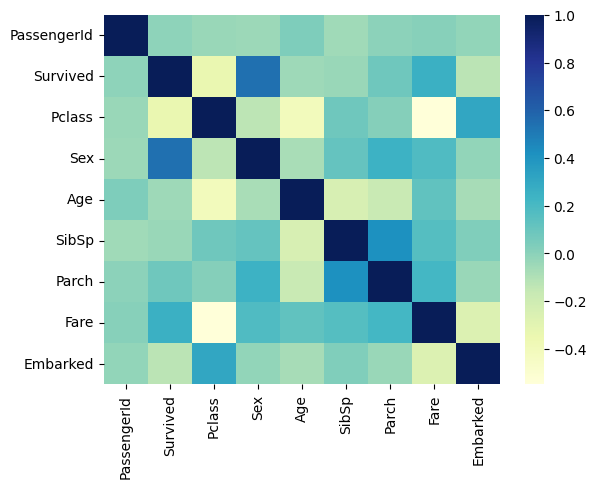

In [ ]:
#Checking correlation
sns.heatmap(train_data.corr(),cmap = 'YlGnBu')
plt.show()

In [ ]:
#Assigning X and Y and training a model on RandomForestClassifier
from sklearn.model_selection import train_test_split
X = train_data.drop('Survived',axis = 1)
Y = train_data['Survived']
X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
#Predicting and checking the accuracy
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X_val)
print('Validation Accuracy:', accuracy_score(Y_val, Y_pred))

Validation Accuracy: 0.8491620111731844


In [ ]:
#Predicting on the test_csv
predictions = model.predict(test_data)

In [ ]:
#Creating a new dataframe with PassengerID and Survived Column
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions.astype(int)
})

In [ ]:
#Saving the submission DF as a csv
submission.to_csv('submission.csv', index=False)

In [ ]:
#Saving the model to be later used without retraining the model.
import joblib
joblib.dump('model','titanic_model.pkl')

['titanic_model.pkl']

In [ ]:
loaded_model = joblib.load('titanic_model.pkl')

predictions = loaded_model.predict(X_test)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,1
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,1
